<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
* X6 = the repayment status in September, 2005; 
* X7 = the repayment status in August, 2005; . . .;
* X11 = the repayment status in April, 2005.

 The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('https://github.com/Ali-Asgar-Lakdawala/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true',header = 1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


---
# Functions
---

In [4]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [5]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    try:
      # finding the best parameters of the model if any 
      print("The best parameters found out to be :" ,model.best_params_,'\n')
    except:
      pass

  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (predicted,actual,append=True):
    accuracy = accuracy_score(predicted,actual)
    precision = precision_score(predicted,actual)
    recall = recall_score(predicted,actual)
    f1 = f1_score(predicted,actual)
    roc= roc_auc_score(predicted,actual)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(y_pred_train,y_train,False)
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(y_pred_test,y_test)
  



  # test_accuracy = accuracy_score(y_pred_test,y_test)
  # test_precision = precision_score(y_pred_test,y_test)
  # test_recall = recall_score(y_pred_test,y_test)
  # test_f1 = f1_score(y_pred_test,y_test)
  # test_roc= roc_auc_score(y_pred_test,y_test)
  # print("The accuracy on test data is ", test_accuracy)
  # print("The precision on test data is ", test_precision)
  # print("The recall on test data is ", test_recall)
  # print("The f1 on test data is ", test_f1)

  # accuracy.append(test_accuracy)
  # precision.append(test_precision)
  # recall.append(test_recall)
  # f1_score.append(test_f1)


In [6]:
def age_group(x):
  if x in range(1,30):
    return '21_29'
  elif x in range(30,40):
    return '30_39'
  elif x in range(40,50):
    return '40_49'
  elif x in range(50,60):
    return '50_59'
  else:
    return '60_&_above'

In [7]:
def feature_importances_graph (model,dependent_variable):
  '''
  shows the graph of feature importance
  '''
  features = df.drop(dependent_variable,axis=1).columns
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(10,40))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  

  plt.show()


In [8]:
pip install lime

In [9]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  X=final_df.drop('trip_duration',axis=1)
  feature_names =list(final_df.drop('trip_duration',axis=1).columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)


---
# Dataset inspection
---

In [10]:
# to get the first five rows of the data set 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
# to get the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
# finding the count of null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
# to get the description of the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


---
# Univariate analysis
---

In [14]:
#changing the names of columns
df.rename(columns={'default payment next month' : 'Is_Defaulter','PAY_0': 'PAY_1'}, inplace=True)

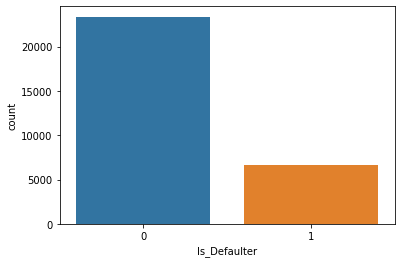

In [15]:
# to check weather the data set is balance or not 
sns.countplot(df['Is_Defaulter'])

this data set is quite imbalance with defaulter as only 22 percent 

---
# Bivariate Analysis
---

## Sex

In [16]:
# creating a dataframe for catagorical varibles
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','Is_Defaulter']
df_cat = df[categorical_features]

In [17]:
# changing the lable values to understandable values
df_cat.replace({'SEX': {1 : 'Male', 2 : 'Female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

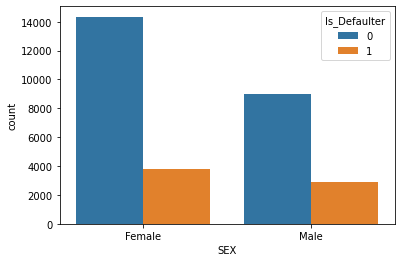

In [18]:
sns.countplot(x = 'SEX', hue = 'Is_Defaulter', data = df_cat)

In [19]:
# finding the percentage values of the defaulters in sex
df[['Is_Defaulter','SEX']].groupby('SEX').mean().reset_index()

,SEX,Is_Defaulter
0,1,0.241672
1,2,0.207763


observation
* number of women are more than number of men 
* male are more likely to default than women 

## Education

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

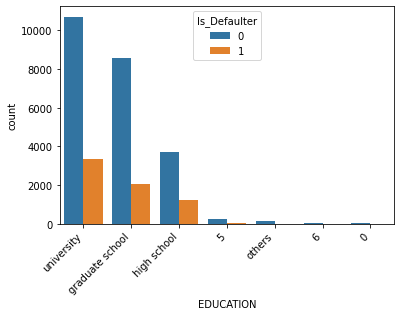

In [20]:
sns.countplot(x = 'EDUCATION', hue = 'Is_Defaulter', data = df_cat)
plt.xticks(rotation=45,horizontalalignment='right')

In [21]:
# replacing the values of undocumented lables to others
df_cat.replace({'EDUCATION' : {5 : 'others', 6 : 'others', 0 : 'others'}},inplace=True)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

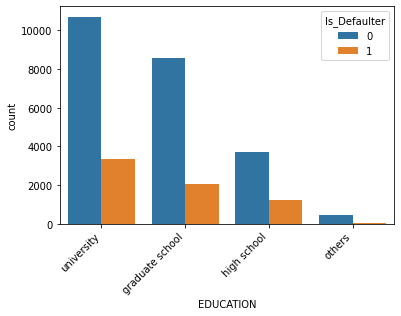

In [22]:
sns.countplot(x = 'EDUCATION', hue = 'Is_Defaulter', data = df_cat)
plt.xticks(rotation=45,horizontalalignment='right')

In [23]:
# finding the percentage values of the defaulters in education feature
df_cat[['Is_Defaulter','EDUCATION']].groupby('EDUCATION').mean().reset_index()

,EDUCATION,Is_Defaulter
0,graduate school,0.192348
1,high school,0.251576
2,others,0.070513
3,university,0.237349


**Obsevation**
* category 5,6 and 0 are undocumented which might be of lower education,no education or education higher than high school we can convert them to others 
* as the eduaction increases the chances of defaulter also increaases

## Marriage

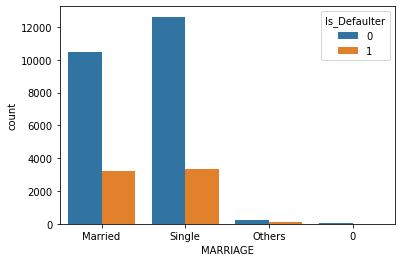

In [24]:
sns.countplot(x = 'MARRIAGE', hue = 'Is_Defaulter', data = df_cat)

In [25]:
# replacing the values of undocumented lables to others
df_cat.replace({'MARRIAGE' : {0 : 'Others'}},inplace=True)

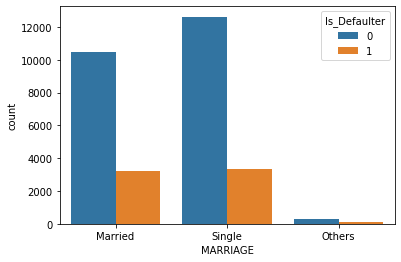

In [26]:
sns.countplot(x = 'MARRIAGE', hue = 'Is_Defaulter', data = df_cat)

In [27]:
# finding the percentage values of the defaulters in education feature
df_cat[['Is_Defaulter','MARRIAGE']].groupby('MARRIAGE').mean().reset_index()

,MARRIAGE,Is_Defaulter
0,Married,0.234717
1,Others,0.236074
2,Single,0.209283


observation
* MARRIAGE has a label 0 that is undocumented which can be converted to others
* Married and others are more likely to default 

## Age

In [28]:
# creating a dataframe for all the numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

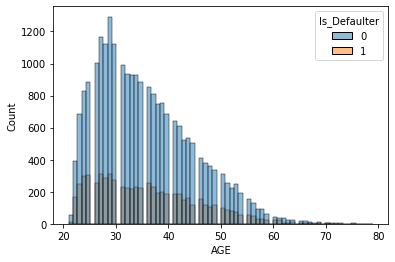

In [29]:
sns.histplot(x='AGE', hue='Is_Defaulter',data=df_num)

In [30]:
# grouping the age column to diffrent groups
df_num['age_group']=df_num['AGE'].apply(lambda x: age_group(x))

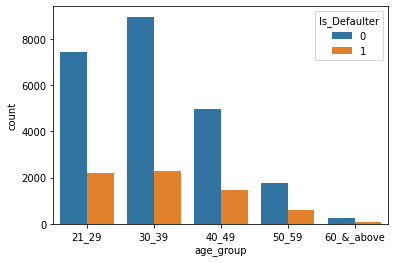

In [31]:
sns.countplot(x=df_num['age_group'].sort_values(),data=df,hue='Is_Defaulter')

In [32]:
# finding the percentage values of the defaulters in education feature
df_num[['Is_Defaulter','age_group']].groupby('age_group').mean().reset_index()

,age_group,Is_Defaulter
0,21_29,0.228426
1,30_39,0.202527
2,40_49,0.229734
3,50_59,0.248612
4,60_&_above,0.283186


observation
* as the age increases the number of defaulters also increases

## Pay

In [33]:
pay_df=df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [34]:
pay_df.describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


observation

* payment months has a label 0 that is undocumented
* -2 might mean that payment is payed before time or payed duly so we can convert this -2,-1 to 0 as payed duly

## Bill Amount

In [35]:
bill_amt_df=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [36]:
bill_amt_df.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


observation 
* -ve values can be of credit

---
# Feature engineering
---

In [37]:
#converting the outlers to relavent labels
# replacing male(1) to 0 and female(2) to 1
df.replace({'SEX': {1 : 0, 2 : 1}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',5 : 'others', 6 : 'others', 0 : 'others',}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others', 0 :'Others'}}, inplace = True)

In [38]:
df.EDUCATION.value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

In [39]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

In [40]:
# grouping the age feature by a cousom function in group of 10
df['age_group']=df['AGE'].apply(lambda x: age_group(x))

In [41]:
#droping the age feature 
df=df.drop('AGE',axis=1)

In [42]:
# converting the columns to dummy variables
df = pd.get_dummies(df,columns=['EDUCATION','MARRIAGE','age_group'])

In [43]:
# droping the id feature as it is uniqe for each row
df=df.drop('ID',axis=1)

In [44]:
# fetching the names of the coumns
df.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Is_Defaulter',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_Married',
       'MARRIAGE_Others', 'MARRIAGE_Single', 'age_group_21_29',
       'age_group_30_39', 'age_group_40_49', 'age_group_50_59',
       'age_group_60_&_above'],
      dtype='object')

In [45]:
# fetching first 5 rows of the data
df.head()

,LIMIT_BAL,SEX,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,age_group_21_29,age_group_30_39,age_group_40_49,age_group_50_59,age_group_60_&_above
0,20000,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0
1,120000,1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,1,0,0,1,1,0,0,0,0
2,90000,1,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1,0,0,1,0,1,0,0,0
3,50000,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,1,1,0,0,0,1,0,0,0
4,50000,0,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,1,1,0,0,0,0,0,1,0


In [46]:
# fetching the number of rows and columns of the data
df.shape

(30000, 33)

In [47]:
def remove_lables (x):
  if x <=0:
    x = 0
  elif x > 3:
    x = 3
  return x

In [48]:
# df.PAY_1=df.PAY_1.apply(lambda x: remove_lables(x))
# df.PAY_2=df.PAY_2.apply(lambda x: remove_lables(x))
# df.PAY_3=df.PAY_3.apply(lambda x: remove_lables(x))
# df.PAY_4=df.PAY_4.apply(lambda x: remove_lables(x))
# df.PAY_5=df.PAY_5.apply(lambda x: remove_lables(x))
# df.PAY_6=df.PAY_6.apply(lambda x: remove_lables(x))

description of pay_df
* 0 means payed duly
* 1 payment delay for one month
* 2 payment delay for two month
* 3 payment delay for three or more month

In [49]:
# storingt the old and new names of colums  in dictionary for convertion 
PAY={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'}
BILL={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}
PAY_AMT={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}

In [50]:
# changing the names of the columns based on above dictionary
df.rename(columns=PAY,inplace=True)
df.rename(columns=BILL, inplace = True)
df.rename(columns=PAY_AMT,inplace=True)

In [51]:
# checking for the datatypes of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int64
 2   PAY_SEPT                   30000 non-null  int64
 3   PAY_AUG                    30000 non-null  int64
 4   PAY_JUL                    30000 non-null  int64
 5   PAY_JUN                    30000 non-null  int64
 6   PAY_MAY                    30000 non-null  int64
 7   PAY_APR                    30000 non-null  int64
 8   BILL_AMT_SEPT              30000 non-null  int64
 9   BILL_AMT_AUG               30000 non-null  int64
 10  BILL_AMT_JUL               30000 non-null  int64
 11  BILL_AMT_JUN               30000 non-null  int64
 12  BILL_AMT_MAY               30000 non-null  int64
 13  BILL_AMT_APR               30000 non-null  int64
 14  PAY_AMT_SEPT          

In [52]:
# convert to dummy varibles
df = pd.get_dummies(df,columns=['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'])

In [53]:
df.shape

(30000, 91)

In [54]:
X = df.drop(['Is_Defaulter'],axis=1)
y = df['Is_Defaulter']

In [55]:
X.shape

(30000, 90)

In [56]:
y.shape

(30000,)

In [57]:
df['Is_Defaulter'].value_counts()

0    23364
1     6636
Name: Is_Defaulter, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [59]:
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23364],
       [    1, 23364]])

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=0)

---
# Logestic Regrestion
---

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
# converting the data to normal disrtibution
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train)
X_test_lr=scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [64]:
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [65]:
log_reg_grid = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='accuracy') 

In [66]:
train_and_score(log_reg_grid, X_test_lr, X_train_lr, y_test, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   59.6s finished


Training time: 1.1245min 

The best parameters found out to be : {'C': 10, 'max_iter': 1000, 'penalty': 'l2'} 

 
where negative mean squared error is:  0.880300180591125 

score matrix for train
********************************************************************************
The accuracy is  0.88164127147178
The precision is  0.8080027477245406
The recall is  0.9467435777047422
The f1 is  0.8718883192291061
the auc  is  0.8900922536683814


score matrix for test
********************************************************************************
The accuracy is  0.8776750556411573
The precision is  0.8086513994910941
The recall is  0.9406077348066298
The f1 is  0.8696524673903129
the auc  is  0.8850302054740738


---
# Desision Tree
---

In [67]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.004min 

score matrix for train
********************************************************************************
The accuracy is  0.8313644923814415
The precision is  0.7506361323155216
The recall is  0.8984771573604061
The f1 is  0.8179297597042514
the auc  is  0.8404624946192293


score matrix for test
********************************************************************************
The accuracy is  0.8234891285738744
The precision is  0.7344438720018318
The recall is  0.8923975794672045
The f1 is  0.8057526847955787
the auc  is  0.8339775889014381


---
# Random forest
---

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# max_depth = 15, n_estimators=100

In [70]:
# creating Random Forest Regressor model
rfc=RandomForestClassifier(n_jobs=-1,verbose=0)

In [71]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc,X_train, X_test, y_train, y_test,best_parameter=True)

Training time: 0.0311min 

score matrix for train
********************************************************************************
The accuracy is  0.9994007875363807
The precision is  0.9996607294317218
The recall is  0.9991522550016955
The f1 is  0.999406427541762
the auc  is  0.999403236767791


score matrix for test
********************************************************************************
The accuracy is  0.8648918564172802
The precision is  0.8226572786078196
The recall is  0.8977386306846576
The f1 is  0.8585596080891358
the auc  is  0.8675057267300796


## implimenting grid search random forest
---

In [72]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [73]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [150,200,250],'max_depth': [3,5,9],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='balanced_accuracy',cv=5,verbose=5,n_jobs=-1)

In [74]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min finished


Training time: 1.6243min 

The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200} 

 
where negative mean squared error is:  0.8475091853619505 

score matrix for train
********************************************************************************
The accuracy is  0.8754494093477144
The precision is  0.8495335029686175
The recall is  0.8981348637015782
The f1 is  0.8731583994420713
the auc  is  0.8764339565805631


score matrix for test
********************************************************************************
The accuracy is  0.8441476916053188
The precision is  0.803995649436144
The recall is  0.8732823478206803
The f1 is  0.837207916070577
the auc  is  0.8463601002405622


---
#XGboost
---

In [76]:
from xgboost import XGBClassifier

In [77]:
# creating XGBRegressor model
xgbc=XGBClassifier()

In [78]:
# training and evaluating the xgb_grid
train_and_score(xgbc,X_train, X_test, y_train, y_test)

Training time: 0.0504min 

score matrix for train
********************************************************************************
The accuracy is  0.8756206129087485
The precision is  0.8240882103477524
The recall is  0.9211224876753887
The f1 is  0.8699077804637836
the auc  is  0.8796467619400664


score matrix for test
********************************************************************************
The accuracy is  0.8730810934200764
The precision is  0.8126395328868281
The recall is  0.9235573482532041
The f1 is  0.8645554202192449
the auc  is  0.8786020540503633


In [79]:
xgbc.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

## implimenting grid search xgb
---

In [80]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='balanced_accuracy',verbose=5,n_jobs=-1)

In [81]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.3min finished


Training time: 1.3653min 

The best parameters found out to be : {'max_depth': 5, 'n_estimators': 50} 

 
where negative mean squared error is:  0.8743908761016069 

score matrix for train
********************************************************************************
The accuracy is  0.8874336586200993
The precision is  0.8330788804071246
The recall is  0.9368561617703167
The f1 is  0.8819251144832541
the auc  is  0.8920305653572081


score matrix for test
********************************************************************************
The accuracy is  0.8756206129087485
The precision is  0.8136126853282959
The recall is  0.927983807782711
The f1 is  0.8670428549641604
the auc  is  0.8814779657261249


---
# CatBoost
---

In [82]:
!pip install catboost

In [83]:
from catboost import CatBoostClassifier

In [84]:
cb_model=CatBoostClassifier(verbose=0)

In [85]:
# training and evaluating the PolynomialFeatures
train_and_score(cb_model,X_train, X_test, y_train, y_test)

Training time: 0.1482min 

 
where negative mean squared error is:  {'learn': {'Logloss': 0.20824844611464574}} 

score matrix for train
********************************************************************************
The accuracy is  0.921160760143811
The precision is  0.8793893129770992
The recall is  0.9610678531701891
The f1 is  0.9184161573212862
the auc  is  0.9239976670431098


score matrix for test
********************************************************************************
The accuracy is  0.8750214004451292
The precision is  0.8191081344095255
The recall is  0.9214373108377873
The f1 is  0.8672646827080429
the auc  is  0.8797635906036043


In [86]:
cb_model=CatBoostClassifier()

In [87]:
# finding the best parameters for XGBRegressor by gridsearchcv
cat_para={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
cat_grid=GridSearchCV(estimator=cb_model,param_grid=cat_para,cv=3,scoring='balanced_accuracy',verbose=0,n_jobs=-1)

In [88]:
# training and evaluating the PolynomialFeatures
train_and_score(cat_grid,X_train, X_test, y_train, y_test)

Learning rate set to 0.167605
0:	learn: 0.6088766	total: 5.93ms	remaining: 884ms
1:	learn: 0.5638715	total: 12.1ms	remaining: 894ms
2:	learn: 0.5279881	total: 17.8ms	remaining: 871ms
3:	learn: 0.4964483	total: 24ms	remaining: 876ms
4:	learn: 0.4604904	total: 30.3ms	remaining: 879ms
5:	learn: 0.4467735	total: 35.9ms	remaining: 861ms
6:	learn: 0.4161272	total: 41.6ms	remaining: 849ms
7:	learn: 0.3869781	total: 47.8ms	remaining: 849ms
8:	learn: 0.3823537	total: 53.9ms	remaining: 845ms
9:	learn: 0.3749463	total: 60.4ms	remaining: 846ms
10:	learn: 0.3719055	total: 66.5ms	remaining: 840ms
11:	learn: 0.3686119	total: 72.6ms	remaining: 835ms
12:	learn: 0.3640356	total: 78.6ms	remaining: 828ms
13:	learn: 0.3428270	total: 84.6ms	remaining: 821ms
14:	learn: 0.3405873	total: 90.5ms	remaining: 815ms
15:	learn: 0.3378605	total: 96.5ms	remaining: 808ms
16:	learn: 0.3359634	total: 103ms	remaining: 802ms
17:	learn: 0.3296607	total: 109ms	remaining: 797ms
18:	learn: 0.3277533	total: 115ms	remaining: 795

In [89]:
# LimeTabularExplainer_table(cat_grid.best_estimator_,instance=2,num_features=5,dependent_var='Rented Bike Count')

---
# lightGBM
---

In [90]:
import lightgbm as lgb

In [91]:
lgbc=lgb.LGBMClassifier()

In [92]:
# training and evaluating the lgbr_grid
train_and_score(lgbc, X_test, X_train, y_test, y_train)

Training time: 0.02min 

 
where negative mean squared error is:  defaultdict(<class 'dict'>, {}) 

score matrix for train
********************************************************************************
The accuracy is  0.8911145351823317
The precision is  0.8284389489953632
The recall is  0.9464390818128311
The f1 is  0.8835164835164835
the auc  is  0.8973653267834086


score matrix for test
********************************************************************************
The accuracy is  0.8774182502996062
The precision is  0.8196776929601357
The recall is  0.929052105364353
The f1 is  0.8709444844989186
the auc  is  0.8825171034459476


In [93]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [50,100,150],'max_depth': [3,5,7]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

In [94]:
# training and evaluating the lgbr_grid
train_and_score(lgbc_grid, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   28.3s finished


Training time: 0.4927min 

The best parameters found out to be : {'max_depth': 7, 'n_estimators': 100} 

 
where negative mean squared error is:  -0.12041314315871443 

score matrix for train
********************************************************************************
The accuracy is  0.8905153227187126
The precision is  0.8284389489953632
The recall is  0.945141065830721
The f1 is  0.8829504896128855
the auc  is  0.8966355982847737


score matrix for test
********************************************************************************
The accuracy is  0.8773326485190892
The precision is  0.8206955046649703
The recall is  0.9278864595320292
The f1 is  0.8710054910432983
the auc  is  0.8822332730560578


---
# score matrix for all the models 
---

In [95]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [98]:
# list of all models
model_name=['Logestic Regrestion','Desision Tree','Random forest','Random forest Grid','a','XGboost','XGboost Grid','CATBoost','CATBoost Grid','lightGBM','lightGBM Grid']

In [99]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [103]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

,Models,accuracy,precision,recall,f1,roc_auc
0,Logestic Regrestion,0.877675,0.808651,0.940608,0.869652,0.885030
1,Desision Tree,0.823489,0.734444,0.892398,0.805753,0.833978
2,Random forest,0.864892,0.822657,0.897739,0.858560,0.867506
3,Random forest Grid,0.844148,0.803996,0.873282,0.837208,0.846360
4,XGboost,0.873081,0.812640,0.923557,0.864555,0.878602
5,XGboost Grid,0.875621,0.813613,0.927984,0.867043,0.881478
6,CATBoost,0.875021,0.819108,0.921437,0.867265,0.879764
7,CATBoost Grid,0.874736,0.816131,0.923680,0.866582,0.879947
8,lightGBM,0.877418,0.819678,0.929052,0.870944,0.882517
9,lightGBM Grid,0.877333,0.820696,0.927886,0.871005,0.882233
